C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\3369813002.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adj Close'].fillna(data['Adj Close'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\3369813002.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Adj Close'].resample('M').mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8868\3369813002.py:26: FutureWarning: 'Y' is deprecated and will be removed in a futu

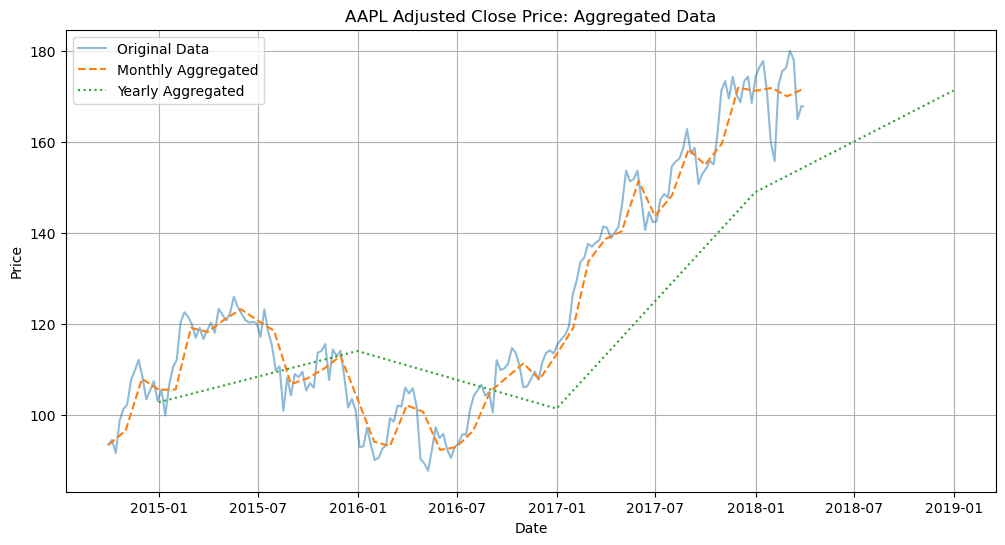

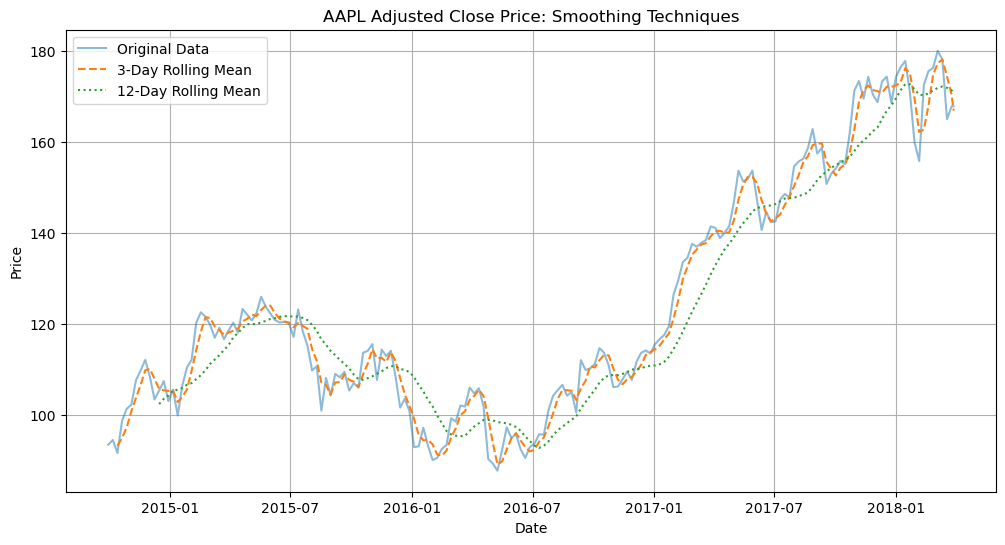

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stock data
file_path = "C:\\Users\\Lenovo\\Downloads\\AAPL.csv"
data = pd.read_csv(file_path)

# Ensure column names have no leading/trailing spaces
data.columns = data.columns.str.strip()

# Check if 'Adj Close' column exists
if 'Adj Close' not in data.columns:
    raise KeyError("'Adj Close' column not found in the dataset. Please check the column name.")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Handle missing values
data['Adj Close'].fillna(data['Adj Close'].mean(), inplace=True)

# Aggregation: Resampling data to monthly and yearly means
monthly_data = data['Adj Close'].resample('M').mean()
yearly_data = data['Adj Close'].resample('Y').mean()

# Smoothing: Using rolling mean to remove short-term fluctuations
rolling_mean_3 = data['Adj Close'].rolling(window=3).mean()
rolling_mean_12 = data['Adj Close'].rolling(window=12).mean()

# Plotting original data vs aggregated data
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Original Data', alpha=0.5)
plt.plot(monthly_data, label='Monthly Aggregated', linestyle='dashed')
plt.plot(yearly_data, label='Yearly Aggregated', linestyle='dotted')
plt.title('AAPL Adjusted Close Price: Aggregated Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting original vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Original Data', alpha=0.5)
plt.plot(rolling_mean_3, label='3-Day Rolling Mean', linestyle='dashed')
plt.plot(rolling_mean_12, label='12-Day Rolling Mean', linestyle='dotted')
plt.title('AAPL Adjusted Close Price: Smoothing Techniques')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
